In [1]:
import pandas as pd

In [13]:
srate=44100
segments = pd.read_csv('audiosegs.csv',header=None,sep='\t')
segments.columns = ['segment_audio','from_sec','to_sec']

segments['duration_sec'] =segments['to_sec'] - segments['from_sec']
segments['from_frame']=segments['from_sec']*srate
segments['to_frame']=segments['to_sec']*srate

segments

,segment_audio,from_sec,to_sec,duration_sec,from_frame,to_frame
0,Male,0.00,0.92,0.92,0.0,40572.0
1,Female,0.92,10.72,9.80,40572.0,472752.0
2,Male,10.72,31.00,20.28,472752.0,1367100.0
3,Female,31.00,32.76,1.76,1367100.0,1444716.0
4,Music,32.78,41.46,8.68,1445598.0,1828386.0


In [14]:
activity=segments
activity


,segment_audio,from_sec,to_sec,duration_sec,from_frame,to_frame
0,Male,0.00,0.92,0.92,0.0,40572.0
1,Female,0.92,10.72,9.80,40572.0,472752.0
2,Male,10.72,31.00,20.28,472752.0,1367100.0
3,Female,31.00,32.76,1.76,1367100.0,1444716.0
4,Music,32.78,41.46,8.68,1445598.0,1828386.0


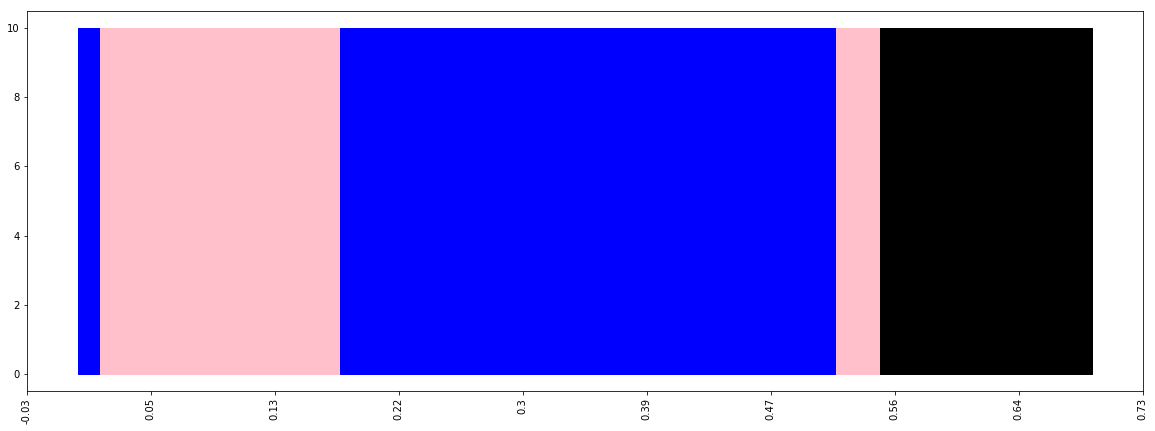

In [15]:
%matplotlib inline

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

# Plotting ..

def format_func(value, tick_number):
        
        return round(value/60,2)


fig = plt.figure(figsize=(20, 7))
ax = fig.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xticks(activity.from_sec.values)

plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(LinearLocator(10))

for index, r in activity.iterrows():    
    x = (r.from_sec, r.to_sec)
    
    
    if (r.segment_audio == 'NOACTIVITY'):
        h = 1 
        z = 10
        col='grey'
    elif (r.segment_audio == 'Female'):
        h = 1 
        z = 10
        col='pink'
    elif (r.segment_audio == 'Male'):
        h = 1 
        z = 10
        col='blue'
    elif (r.segment_audio == 'Music'):
        h = 1 
        z = 10
        col='black'
    
    ax.fill_between(x, z,color=col)
    
plt.show()


In [7]:
import re


In [8]:
def speech_range(sfrom,sto):
    out= str(sfrom)+"_"+str(sto)
    return out
    

    
print(speech_range(23.90,34.90))    
    

23.9_34.9


In [9]:
segments['needsbreaking'] = segments['duration_sec'].apply(lambda x: 1 if x>11 else 0)
pd.set_option('display.max_colwidth', -1)
print(segments['needsbreaking'].values.sum())
print(len(segments))

52
375


In [10]:
segments


,segment_audio,from_sec,to_sec,duration_sec,from_frame,to_frame,needsbreaking
0,NOACTIVITY,0.00,0.78,0.78,0.0,34398.0,0
1,Female,0.78,5.26,4.48,34398.0,231966.0,0
2,Male,5.26,9.40,4.14,231966.0,414540.0,0
3,Female,9.40,11.88,2.48,414540.0,523908.0,0
4,Male,11.88,13.60,1.72,523908.0,599760.0,0
5,Female,13.60,31.74,18.14,599760.0,1399734.0,1
6,Male,31.74,35.20,3.46,1399734.0,1552320.0,0
7,Female,35.20,46.88,11.68,1552320.0,2067408.0,1
8,NOACTIVITY,46.92,48.38,1.46,2069172.0,2133558.0,0
9,Female,48.38,49.84,1.46,2133558.0,2197944.0,0


In [5]:
from pydub import AudioSegment
import pydub
from pydub.silence import split_on_silence, detect_silence


sound_file = AudioSegment.from_wav("ZOOM0017.WAV")

print (detect_silence(sound_file, silence_thresh=sound_file.dBFS-1, min_silence_len=3000))


[[4398, 7991], [15735, 19511], [20266, 31990], [33998, 41507]]


In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
#from dtw import dtw
from numpy.linalg import norm

In [17]:

#Loading audio file
y1, sr1 = librosa.load('ZOOM0017.WAV') 

In [11]:
# short fourier transform . used to determine sinusoidal frequency and phase content of local sections of
# signal as it changes over time.

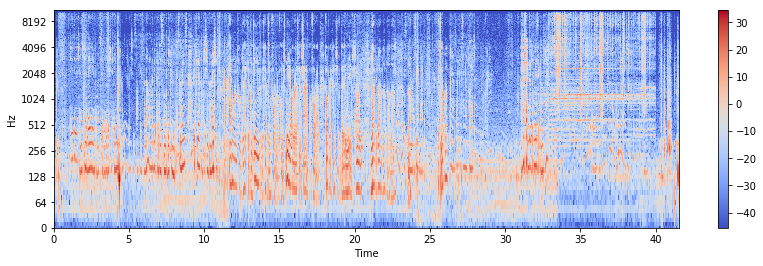

In [18]:
S = librosa.stft(y1)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

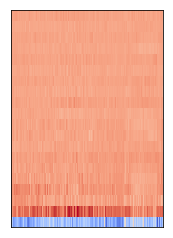

In [8]:
#Feature extraction
# Identify components of audio signal that are good for identifying linguistic content
# and ignoring other information like noise MEL FREQUENCY CEPSTRUM
# CEPSTRUM = inverse fourier tranform of logarithm of estimated spectrum of a signal

plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
librosa.display.specshow(mfcc1)
